Numericky spočítejte integrály z funkcí fn
kde fn (x1, x2, ... xn) = Σ xi^2      n<1,..,5>, a to vždy na oblasti <-1,1>^n

a) klasickou num. metodou (obdélníkovou resp. jejími vícedimenz. analogiemi)

b) MC metodou využívající střední hodnotu integrované funkce. s chybou Ɛ<=0.01 .

Sestrojte v obou případech a), b) závislost doby výpočtu t na dimenzi definičního oboru n. 

A) Obdelnikova metoda

In [3]:
import numpy as np

### 1D

In [64]:
def f_ce(x):
    return x**2


def D1(a,b, pocet_kroku):

    h = (b - a) / pocet_kroku
    integral = 0
    
    for i in range(pocet_kroku):
        x = a + i*h + h/2
        integral += f_ce(x)
    integral *= h
    
    return integral

In [65]:
a, b = -1, 1
pocet_kroku = 100
analyticky_vysledek = 2/3
chyba = 0.01

for i in range(1, pocet_kroku):
    integral = D1(a,b, i)
    if abs(integral - analyticky_vysledek) <= chyba:
        pocet_pro_nalezeni = i
        break

pocet_pro_nalezeni

9

### 2D

double integral (x^2 + y^2)with range -1, 1 

In [69]:
def f2D(x, y):
    return x**2 + y**2

a, b = -1, 1
pocet_kroku = 100
analyticky_vysledek = 8/3
chyba = 0.01

for aktualni_krok in range(1, pocet_kroku): 
    pocet_kroku_x = pocet_kroku_y = aktualni_krok
    hx = hy = (b - a) / pocet_kroku_x

    integral = 0
    for i in range(pocet_kroku_x):
        for j in range(pocet_kroku_y):
            x = a + i * hx + hx/2 # h/2 - skocit do pulky obdelniku
            y = a + j * hy + hy/2
            integral += f2D(x, y)
    integral *= hx * hy  
    
    if abs(integral - analyticky_vysledek) <= chyba:
        pocet_pro_nalezeni = aktualni_krok
        break    

pocet_pro_nalezeni

17

### 3D

definite integral from -1 to 1 definite integral from -1 to 1 definite integral from -1 to 1 (x**2 +y**2 + z**2 ) dx dy dz 

In [72]:
def f3D(x,y,z):
    return x**2 + y**2 + z**2

a,b = -1, 1
pocet_kroku = 100
analyticky_vysledek = 8
chyba = 0.01

for aktualni_krok in range(1, pocet_kroku):
    integral = 0
    pc_x = pc_y = pc_z = aktualni_krok
    hx = hy = hz = (b-a)/pc_x

    for i in range(pc_x):
        for j in range(pc_y):
            for k in range(pc_z):
                x = a + i*hx + hx/2
                y = a + j*hy + hy/2
                z = a + k*hz + hz/2
                integral += f3D(x,y,z)
    integral *= hx*hy*hz
    
    if abs(integral - analyticky_vysledek) <= chyba:
        pocet_pro_nalezeni = aktualni_krok
        break
     
pocet_pro_nalezeni

29

### 4D

In [82]:
def f4D(x,y,z,w):
    return x**2 + y**2 + z**2 + w**2

a,b = -1, 1
pocet_kroku = 50
chyba = 0.01
analyticky_vysledek = 64/3

for aktualni_krok in range(1, pocet_kroku):
    
    integral = 0
    pc_x = pc_y = pc_z = pc_w = aktualni_krok
    hx = hy = hz = hw= (b-a)/pc_x

    for i in range(pc_x):
        for j in range(pc_y):
            for k in range(pc_z):
                for l in range(pc_w):
                    x = a + i*hx + hx/2
                    y = a + j*hy + hy/2
                    z = a + k*hz + hz/2
                    w = a + l*hw + hw/2
                    integral += f4D(x,y,z,w)
    integral *= hx*hy*hz*hw

    if abs(integral - analyticky_vysledek) <= chyba:
        pocet_pro_nalezeni = aktualni_krok
        break
    
pocet_pro_nalezeni

47

### 5D

In [1]:
def f5D(x,y,z,w,v):
    return x**2 + y**2 + z**2 + w**2 + v**2

a,b = -1, 1
pocet_kroku = 120
chyba = 0.01
analyticky_vysledek = 53.33

for aktualni_krok in range(70, pocet_kroku):
    
    integral = 0
    pc_x = pc_y = pc_z = pc_w = pc_v = aktualni_krok
    hx = hy = hz = hw = hv = (b-a)/pc_x

    for i in range(pc_x):
        for j in range(pc_y):
            for k in range(pc_z):
                for l in range(pc_w):
                    for t in range(pc_v):
                        x = a + i*hx + hx/2
                        y = a + j*hy + hy/2
                        z = a + k*hz + hz/2
                        w = a + l*hw + hw/2
                        v = a + t*hv + hv/2
                        integral += f5D(x,y,z,w,v)
    integral *= hx*hy*hz*hw*hv

    if abs(integral - analyticky_vysledek) <= chyba:
        pocet_pro_nalezeni = aktualni_krok
        break
    
pocet_pro_nalezeni

70

## B) MC metodou využívající střední hodnotu integrované funkce.

???? jak spocitat presny pocet kroku k nalezeni s chybou jestli generujeme nahodne (jediny napad zprumerovat)

In [84]:
import random
def MC1D(x):
    return x**2

def metoda_stredni_hodnoty_1D(pocet_kroku, a, b):

    hodnota_fce = 0
    
    for i in range(pocet_kroku):
        nahodny_x = random.uniform(a,b) 
        hodnota_fce += MC1D(nahodny_x)

    integral = (b-a)* (1/pocet_kroku) * hodnota_fce
    
    return integral

In [118]:
a,b = -1, 1
max_pocet_kroku = 700
chyba = 0.01
analyticky_vysledek = 2/3
pocet_pro_nalezeni = 0

for i in range(int(1e4)):
    for aktualni_krok in range(1, max_pocet_kroku):
        integral = metoda_stredni_hodnoty_1D(aktualni_krok, a,b)
        if abs(integral - analyticky_vysledek) < 0.001:
            pocet_pro_nalezeni += aktualni_krok
            break
    

pocet_pro_nalezeni /=1e4
pocet_pro_nalezeni 

96.1234

#### 2D

In [120]:
def MC2D(x, y):
    return x**2 + y**2

def metoda_stredni_hodnoty_2D(pocet_kroku, a, b):

    hodnota_fce = 0
    
    for i in range(pocet_kroku):
        nahodny_x = random.uniform(a,b)
        nahodny_y = random.uniform(a, b) 
        hodnota_fce += MC2D(nahodny_x, nahodny_y)

    integral = (b-a)**2 * (1/pocet_kroku) * hodnota_fce
    
    return integral

In [121]:
a,b = -1, 1
max_pocet_kroku = 1000
chyba = 0.01
analyticky_vysledek = 8/3
pocet_pro_nalezeni = 0

for i in range(int(1e4)):
    for aktualni_krok in range(1, max_pocet_kroku):
        integral = metoda_stredni_hodnoty_2D(aktualni_krok, a,b)
        if abs(integral - analyticky_vysledek) < 0.001:
            pocet_pro_nalezeni += aktualni_krok
            break
    

pocet_pro_nalezeni /=1e4
pocet_pro_nalezeni 

195.2487

#### 3D

In [122]:
def MC3D(x, y, z):
    return x**2 + y**2 + z**2

def metoda_stredni_hodnoty_3D(pocet_kroku, a, b):

    hodnota_fce = 0
    
    for i in range(pocet_kroku):
        nahodny_x = random.uniform(a,b)
        nahodny_y = random.uniform(a, b)
        nahodny_z = random.uniform(a, b) 
        hodnota_fce += MC3D(nahodny_x, nahodny_y, nahodny_z)

    integral = (b-a)**3 * (1/pocet_kroku) * hodnota_fce
    
    return integral

In [124]:
a,b = -1, 1
max_pocet_kroku = 2000
chyba = 0.01
analyticky_vysledek = 8
pocet_pro_nalezeni = 0

for i in range(int(1e3)):
    for aktualni_krok in range(1, max_pocet_kroku):
        integral = metoda_stredni_hodnoty_3D(aktualni_krok, a,b)
        if abs(integral - analyticky_vysledek) < 0.001:
            pocet_pro_nalezeni += aktualni_krok
            break
    

pocet_pro_nalezeni /=1e3
pocet_pro_nalezeni 

359.065

#### 4D

In [125]:
def nah_cislo_v_rozmezi(a,b):
    x = random.uniform(a, b)
    y = random.uniform(a, b)
    z = random.uniform(a, b)
    w = random.uniform(a, b)
    return x, y, z, w 

In [126]:
def MC4D(x, y, z, w):
    return x**2 + y**2 + z**2 + w**2

def metoda_stredni_hodnoty_4D(pocet_kroku, a, b):

    hodnota_fce = 0
    
    for i in range(pocet_kroku):
        nahodny_x, nahodny_y, nahodny_z, nahodny_w = nah_cislo_v_rozmezi(a,b)
        hodnota_fce += MC4D(nahodny_x, nahodny_y, nahodny_z, nahodny_w)

    integral = (b-a)**4 * (1/pocet_kroku) * hodnota_fce
    
    return integral

In [127]:
a,b = -1, 1
max_pocet_kroku = 2000
chyba = 0.01
analyticky_vysledek = 64/3
pocet_pro_nalezeni = 0

for i in range(int(1e3)):
    for aktualni_krok in range(1, max_pocet_kroku):
        integral = metoda_stredni_hodnoty_4D(aktualni_krok, a,b)
        if abs(integral - analyticky_vysledek) < 0.001:
            pocet_pro_nalezeni += aktualni_krok
            break
    

pocet_pro_nalezeni /=1e3
pocet_pro_nalezeni 

631.181

#### 5D

In [128]:
def nah_cislo5_v_rozmezi(a,b):
    x = random.uniform(a, b)
    y = random.uniform(a, b)
    z = random.uniform(a, b)
    w = random.uniform(a, b)
    v = random.uniform(a, b)
    return x, y, z, w, v

In [129]:
def MC5D(x, y, z, w, v):
    return x**2 + y**2 + z**2 + w**2 + v**2

def metoda_stredni_hodnoty_5D(pocet_kroku, a, b):

    hodnota_fce = 0
    
    for i in range(pocet_kroku):
        nahodny_x, nahodny_y, nahodny_z, nahodny_w, nahodny_v = nah_cislo5_v_rozmezi(a, b)
        hodnota_fce += MC5D(nahodny_x, nahodny_y, nahodny_z, nahodny_w, nahodny_v)

    integral = (b-a)**5 * (1/pocet_kroku) * hodnota_fce
    
    return integral

In [133]:
a,b = -1, 1
max_pocet_kroku = 5000
chyba = 0.01
analyticky_vysledek = 53.33
pocet_pro_nalezeni = 0

for i in range(int(1e3)):
    for aktualni_krok in range(1, max_pocet_kroku):
        integral = metoda_stredni_hodnoty_4D(aktualni_krok, a,b)
        if abs(integral - analyticky_vysledek) < chyba:
            pocet_pro_nalezeni += aktualni_krok
            break
    

pocet_pro_nalezeni /=1e3
pocet_pro_nalezeni 

: 

# Poovnani  a), b) závislost doby výpočtu t na dimenzi definičního oboru n.

???? casova zavislost - bude to pocitat miliardy let, jednoduse v zavislosti na krocich

In [4]:
# pocet kroku pro dosazeni vysledku s chybou <= 0.01, 1D - 5D
obdelnikova_metoda = [9, 17**2, 29**3, 47**4, 70**5 ] #pocet na dimenze, dopocitat 70 pocitalo 5 hodin
metoda_stredni_hodnoty = [97, 196, 360, 631, 1442 ] # za 9 hodin nedokazalo zprumerovat
dimenze = np.linspace(1, 5, 5)

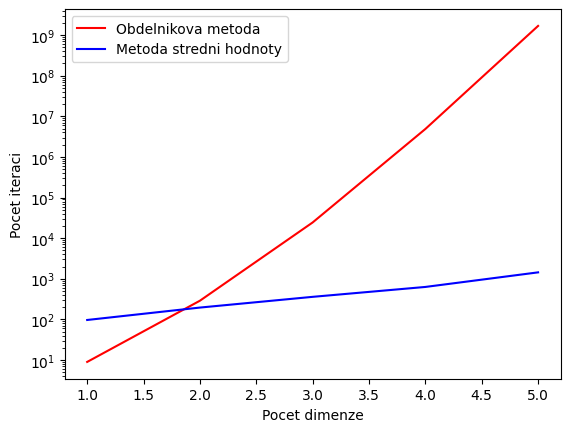

In [5]:
import matplotlib.pyplot as plt
plt.yscale("log")
plt.xlabel("Pocet dimenze")
plt.ylabel("Pocet iteraci")
plt.plot(dimenze, obdelnikova_metoda, color = "red", label = "Obdelnikova metoda")
plt.plot(dimenze, metoda_stredni_hodnoty, color = "blue", label = "Metoda stredni hodnoty")
plt.legend()
plt.show()